Juan de Dios Romero Palop


AFI - Master en Data Science y Big Data


12/05/22

In [2]:
import imblearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_recall_curve
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

Creamos un dataset sintético de 300 elementos desbalanceado (95%-5%). Tendrá 20 features aunque sólo 3 serán informativas.

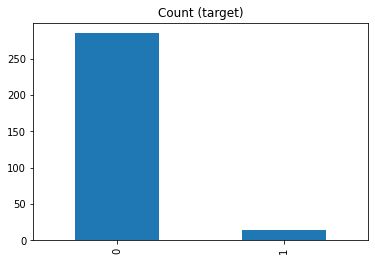

In [3]:
X, y = make_classification(
    n_classes=2, class_sep=1, weights=[0.95, 0.05],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=300, random_state=10
)

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)');

Función de visualización

In [4]:
def plot_2d_space(X, y, label='Classes'):   
    markers = ['o', 's']
    for l, m in zip(np.unique(y), markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

Aplicamos Componentes Principales para reducir la dimensionalidad y poder visualizar.

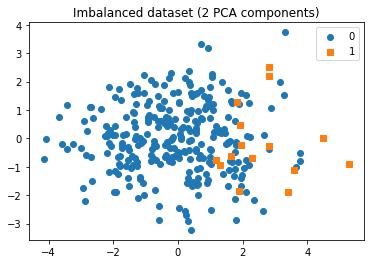

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

## **UnderSampling Aleatorio**

Selected indexes: [ 32 278 250 131 263   2 284 153 183 115 187 147  73 272 149  52  58  83
  86  91 100 107 108 129 132 154 223 271 281 289]


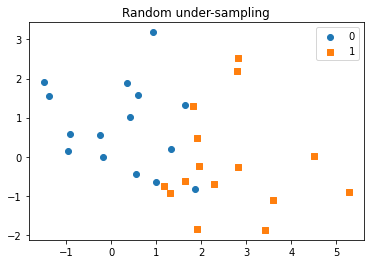

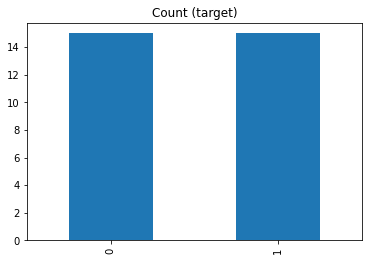

In [6]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)

print('Selected indexes:', rus.sample_indices_)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

df = pd.DataFrame()
df['target'] = y_rus
df.target.value_counts().plot(kind='bar', title='Count (target)');

## **OverSampling por repetición**

270 new random picked points


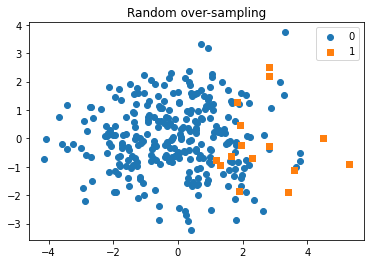

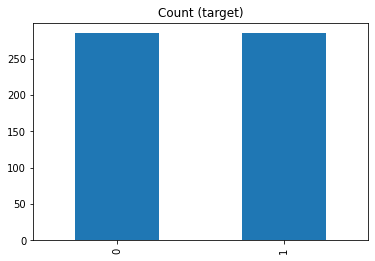

In [7]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

df = pd.DataFrame()
df['target'] = y_ros
df.target.value_counts().plot(kind='bar', title='Count (target)');

## **UnderSampling utilizando Links de Tomek**

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html

Remaining indexes: [  0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  31  32  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 233 234 235 236 237 238
 239 240 241 242 243 244 245 246

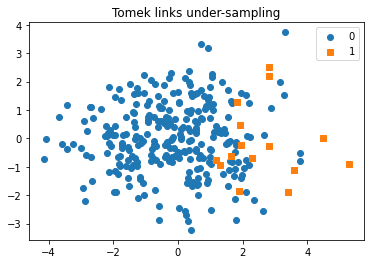

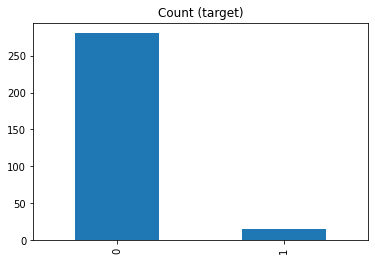

In [8]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)

print('Remaining indexes:', tl.sample_indices_)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

df = pd.DataFrame()
df['target'] = y_tl
df.target.value_counts().plot(kind='bar', title='Count (target)');

In [9]:
y_tl

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

## **UnderSampling aplicando Clustering**

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.ClusterCentroids.html

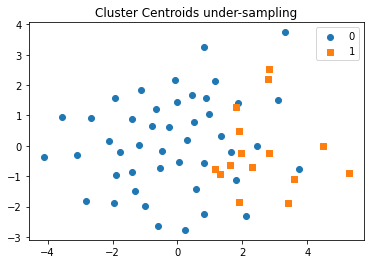

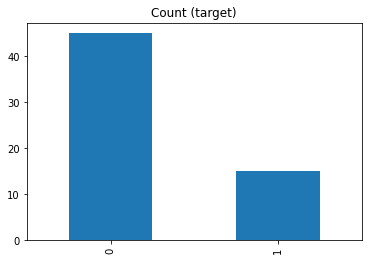

In [10]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy={0: 45})
X_cc, y_cc = cc.fit_resample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

df = pd.DataFrame()
df['target'] = y_cc
df.target.value_counts().plot(kind='bar', title='Count (target)');

## **OverSampling Sintético**

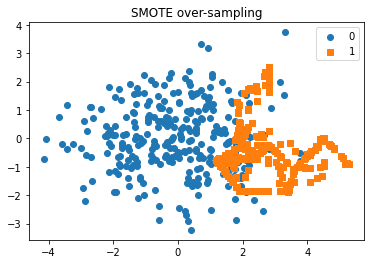

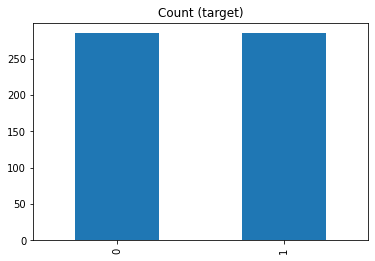

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

df = pd.DataFrame()
df['target'] = y_sm
df.target.value_counts().plot(kind='bar', title='Count (target)');

La librería también contiene funciones para atacar el problema aplicando combinaciones de modelos entrenados con distintos datasets. Veamos el ejemplo de un bagging.

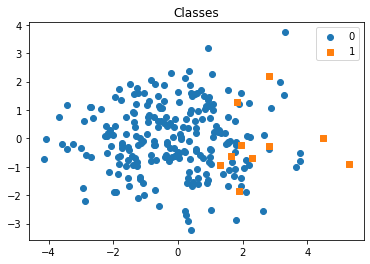

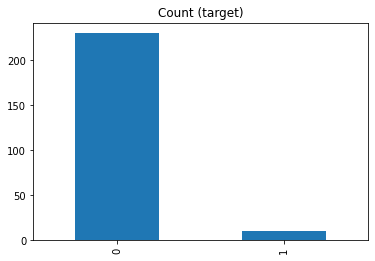

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

plot_2d_space(X_train, y_train)
              
df = pd.DataFrame()
df['target'] = y_train
df.target.value_counts().plot(kind='bar', title='Count (target)');

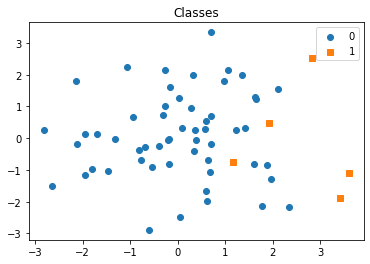

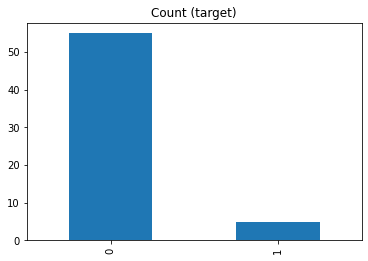

In [13]:
plot_2d_space(X_test, y_test)
              
df = pd.DataFrame()
df['target'] = y_test
df.target.value_counts().plot(kind='bar', title='Count (target)');

In [14]:
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0)
bc.fit(X_train, y_train) 
y_pred = bc.predict(X_test)

y_pred_train = bc.predict(X_train)

print(balanced_accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(balanced_accuracy_score(y_train, y_pred_train))
print(f1_score(y_train, y_pred_train))

0.5909090909090909
0.28571428571428575
0.95
0.9473684210526316


In [15]:
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_train)

In [16]:
precision

array([0.04166667, 1.        , 1.        ])

In [17]:
recall

array([1. , 0.9, 0. ])

In [18]:
thresholds

array([0, 1])